In [4]:
!pip install BorutaShap

In [5]:


import numpy as np
import pandas as pd
import xgboost as xgb
from BorutaShap import BorutaShap
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
!pip install matplotlib seaborn scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
import xgboost as xgb




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_csv("/content/drive/MyDrive/makine öğrenme/Phishing_Legitimate_full.csv")
train = data.drop('id', axis=1)

In [9]:
data.nsmallest(n=5, columns=['id'])

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [10]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

In [11]:
data.tail()


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
9999,10000,3,1,2,52,3,0,0,0,0,...,0,0,0,1,1,1,1,1,1,0


<Axes: xlabel='labels'>

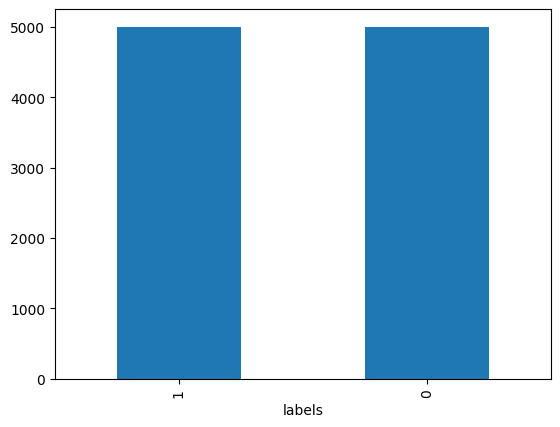

In [12]:
data['labels'].value_counts().plot(kind='bar')

In [13]:
from sklearn.feature_selection import mutual_info_classif


In [14]:
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']

In [16]:
discrete_features = X.dtypes == int

In [17]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      4.646231e-01
PctExtResourceUrls                    2.954467e-01
PctNullSelfRedirectHyperlinks         2.393476e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Use feature importance to select top 30 features
importance = xgb_model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
top_features = feature_importance.nlargest(30, 'Importance')['Feature'].values

# Select only the top 30 features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Print the selected features
print("Selected features:")
print(top_features)

Accuracy: 0.9895
Confusion Matrix:
[[ 974   14]
 [   7 1005]]
Selected features:
['PctExtNullSelfRedirectHyperlinksRT' 'PctExtHyperlinks'
 'FrequentDomainNameMismatch' 'InsecureForms' 'NoHttps'
 'SubmitInfoToEmail' 'PctNullSelfRedirectHyperlinks' 'NumDash'
 'ExtFavicon' 'NumDashInHostname' 'IframeOrFrame' 'NumQueryComponents'
 'ExtFormAction' 'ExtMetaScriptLinkRT' 'PathLevel' 'NumSensitiveWords'
 'QueryLength' 'NumAmpersand' 'NumUnderscore' 'PctExtResourceUrls'
 'NumNumericChars' 'SubdomainLevel' 'NumDots' 'NumPercent' 'MissingTitle'
 'AbnormalExtFormActionR' 'AbnormalFormAction' 'ImagesOnlyInForm'
 'RelativeFormAction' 'DomainInPaths']


In [19]:
xgb_model_selected = xgb.XGBClassifier()

xgb_model_selected.fit(X_train_selected, y_train)

y_pred = xgb_model_selected.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.9865
Confusion Matrix:
[[ 970   18]
 [   9 1003]]


In [20]:
randomforest = RandomForestClassifier()

randomforest.fit(X_train_selected, y_train)

y_pred2 = randomforest.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.984
Confusion Matrix:
[[971  17]
 [ 15 997]]


In [21]:
# Initialize the XGBClassifier with desired parameters for speed
modelXGB = XGBClassifier()

# Initialize BorutaShap with the XGBClassifier
Feature_SelectorXGB = BorutaShap(model=modelXGB, importance_measure='shap', classification=True)

# Fit the feature selector
Feature_SelectorXGB.fit(X=X_train, y=y_train, n_trials=100, random_state=0)

  0%|          | 0/100 [00:00<?, ?it/s]

23 attributes confirmed important: ['NumUnderscore', 'UrlLength', 'HostnameLength', 'NumDash', 'QueryLength', 'IframeOrFrame', 'PctExtHyperlinks', 'NumNumericChars', 'InsecureForms', 'PathLength', 'NumDashInHostname', 'FrequentDomainNameMismatch', 'ExtMetaScriptLinkRT', 'PctNullSelfRedirectHyperlinks', 'NumQueryComponents', 'PctExtNullSelfRedirectHyperlinksRT', 'SubmitInfoToEmail', 'PathLevel', 'SubdomainLevel', 'NumSensitiveWords', 'ExtFavicon', 'PctExtResourceUrls', 'NumDots']
25 attributes confirmed unimportant: ['ImagesOnlyInForm', 'NumPercent', 'PopUpWindow', 'FakeLinkInStatusBar', 'TildeSymbol', 'RandomString', 'EmbeddedBrandName', 'IpAddress', 'RightClickDisabled', 'AtSymbol', 'DoubleSlashInPath', 'MissingTitle', 'DomainInPaths', 'ExtFormAction', 'SubdomainLevelRT', 'AbnormalFormAction', 'NoHttps', 'UrlLengthRT', 'DomainInSubdomains', 'PctExtResourceUrlsRT', 'NumHash', 'NumAmpersand', 'HttpsInHostname', 'AbnormalExtFormActionR', 'RelativeFormAction']
0 tentative attributes remai

In [22]:
subsetXGB = Feature_SelectorXGB.Subset()
selected_features_borutashapXGB = subsetXGB.columns
X_test_selected_borutashapXGB = X_test[selected_features_borutashapXGB]

In [23]:


# Create a new XGBoost classifier with the selected features
xgb_model_selected = xgb.XGBClassifier()

# Fit the model on the selected training data
xgb_model_selected.fit(subsetXGB, y_train)

# Predict the target variable for the test data
y_predXGB = xgb_model_selected.predict(X_test_selected_borutashapXGB)
# y_pred.describe()

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_predXGB)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_predXGB)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.9845
Confusion Matrix:
[[ 967   21]
 [  10 1002]]


In [24]:
# Creating and fitting the models
xgb_model = xgb.XGBClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
gnb_model = GaussianNB()

In [25]:
# Fitting the models
xgb_model.fit(subsetXGB, y_train)
gb_model.fit(subsetXGB, y_train)
dt_model.fit(subsetXGB, y_train)
rf_model.fit(subsetXGB, y_train)
lr_model.fit(subsetXGB, y_train)
ab_model.fit(subsetXGB, y_train)
svm_model.fit(subsetXGB, y_train)
knn_model.fit(subsetXGB, y_train)
gnb_model.fit(subsetXGB, y_train)

GaussianNB()

In [26]:
# Making predictions
xgb_pred = xgb_model.predict(X_test_selected_borutashapXGB)
dt_pred = dt_model.predict(X_test_selected_borutashapXGB)
rf_pred = rf_model.predict(X_test_selected_borutashapXGB)
lr_pred = lr_model.predict(X_test_selected_borutashapXGB)
gb_pred = gb_model.predict(X_test_selected_borutashapXGB)
ab_pred = ab_model.predict(X_test_selected_borutashapXGB)
svm_pred = svm_model.predict(X_test_selected_borutashapXGB)
knn_pred = knn_model.predict(X_test_selected_borutashapXGB)
gnb_pred = gnb_model.predict(X_test_selected_borutashapXGB)

In [27]:
# Evaluating the models
xgb_accuracy = accuracy_score(y_test, xgb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

In [28]:
print("XGBoost Accuracy:", xgb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("GaussianNB Accuracy:", gnb_accuracy)

XGBoost Accuracy: 0.9845
Decision Tree Accuracy: 0.9615
Random Forest Accuracy: 0.983
Logistic Regression Accuracy: 0.923
Gradient Boosting Accuracy: 0.979
AdaBoost Accuracy: 0.9675
SVM Accuracy: 0.856
KNN Accuracy: 0.873
GaussianNB Accuracy: 0.851


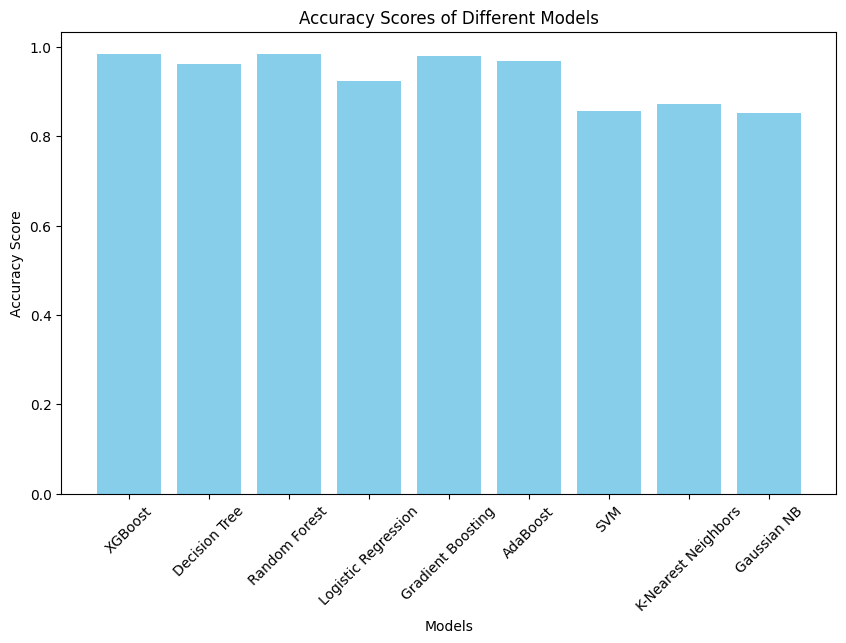

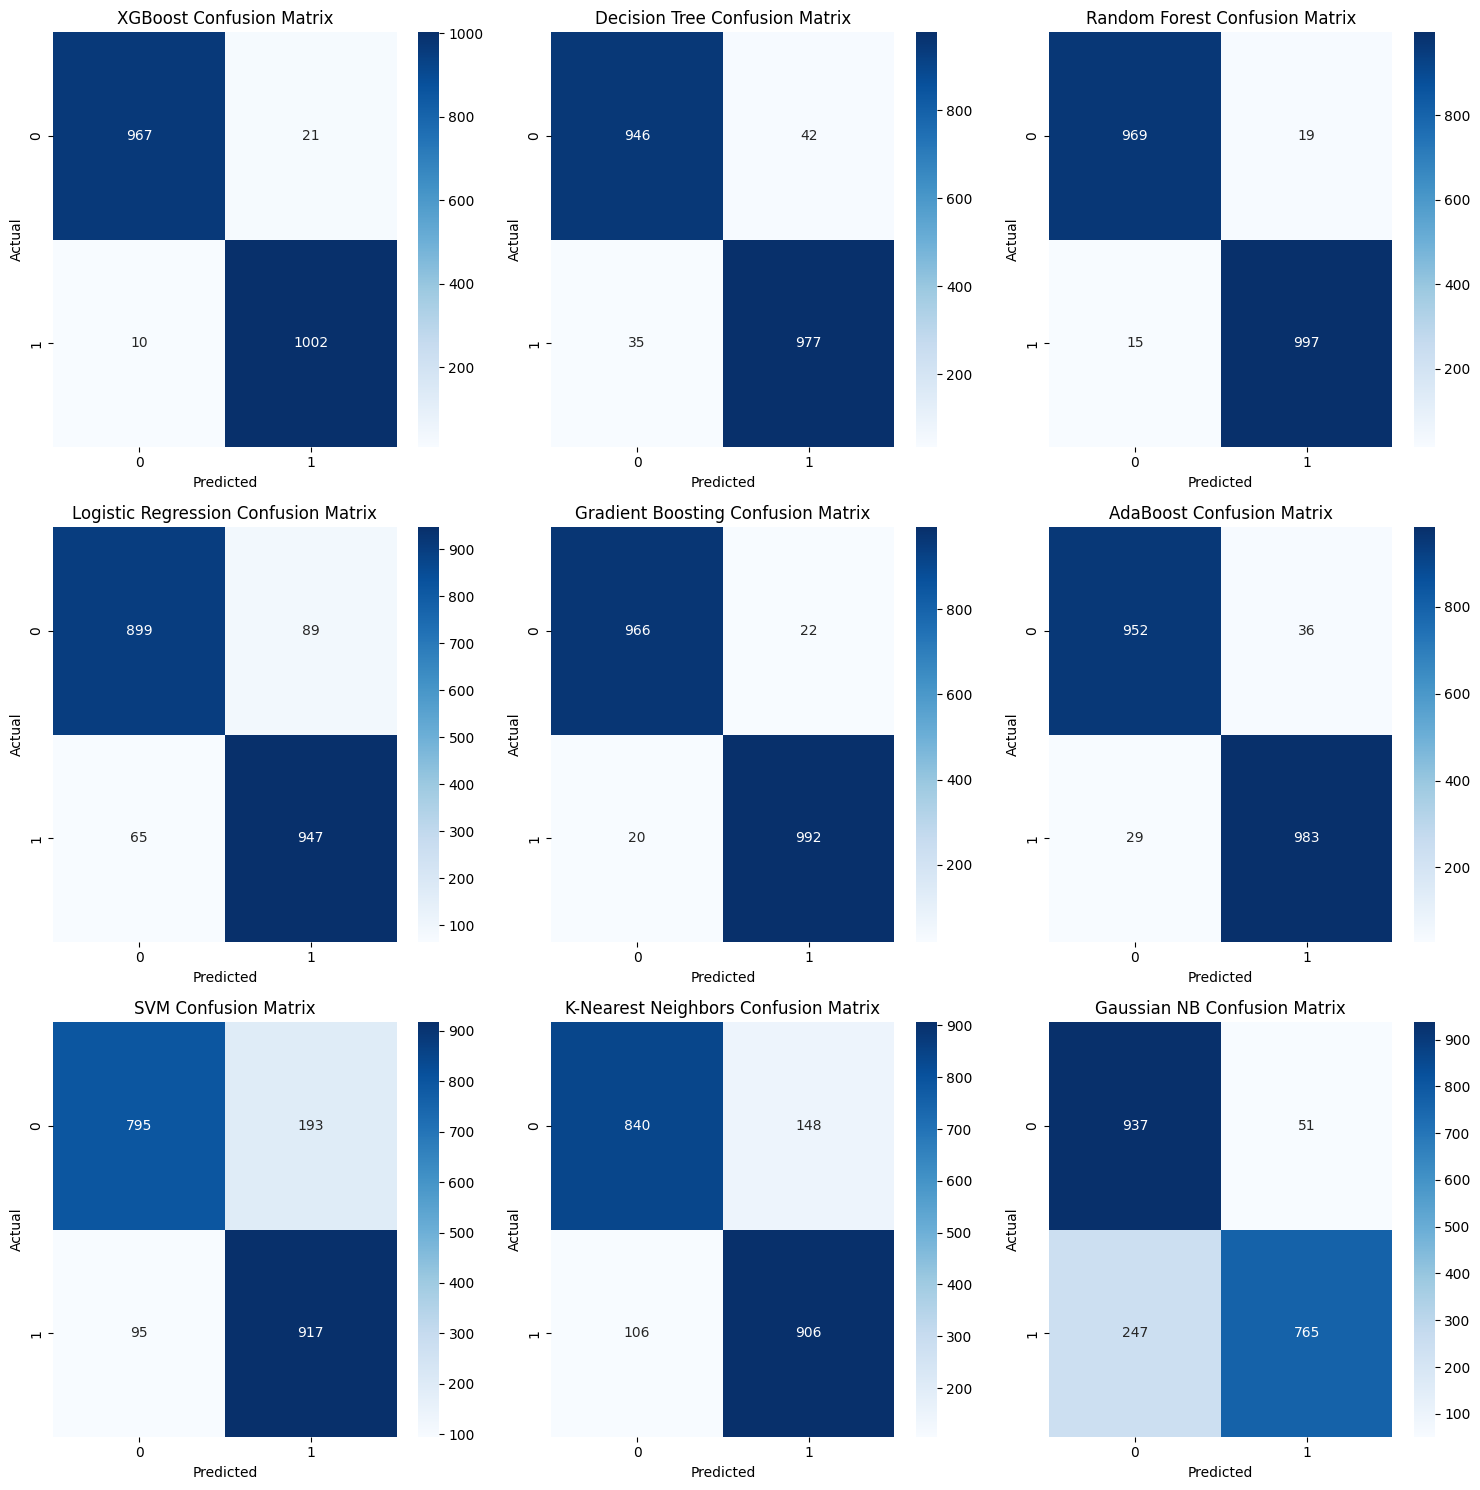

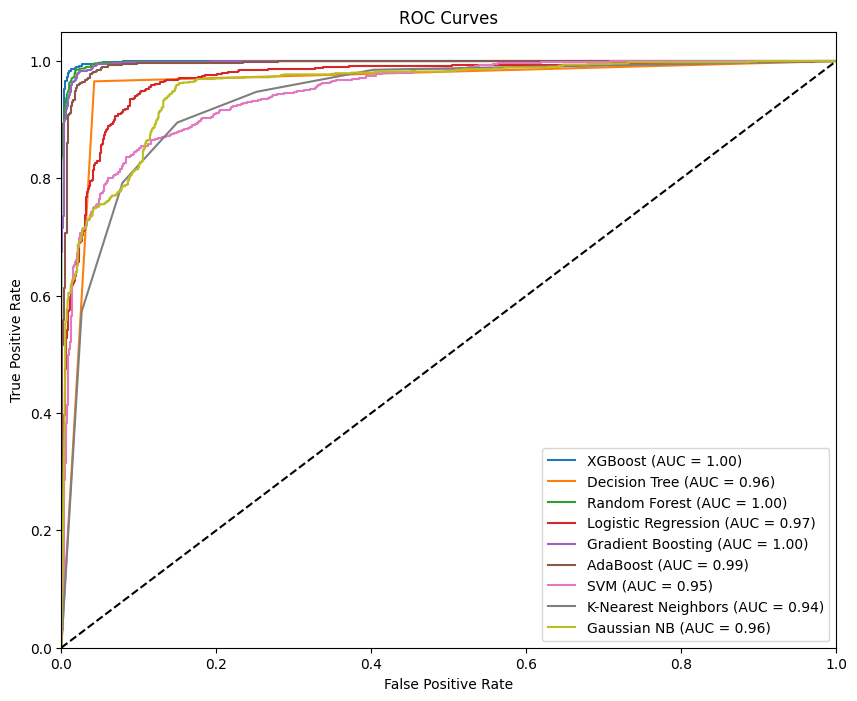

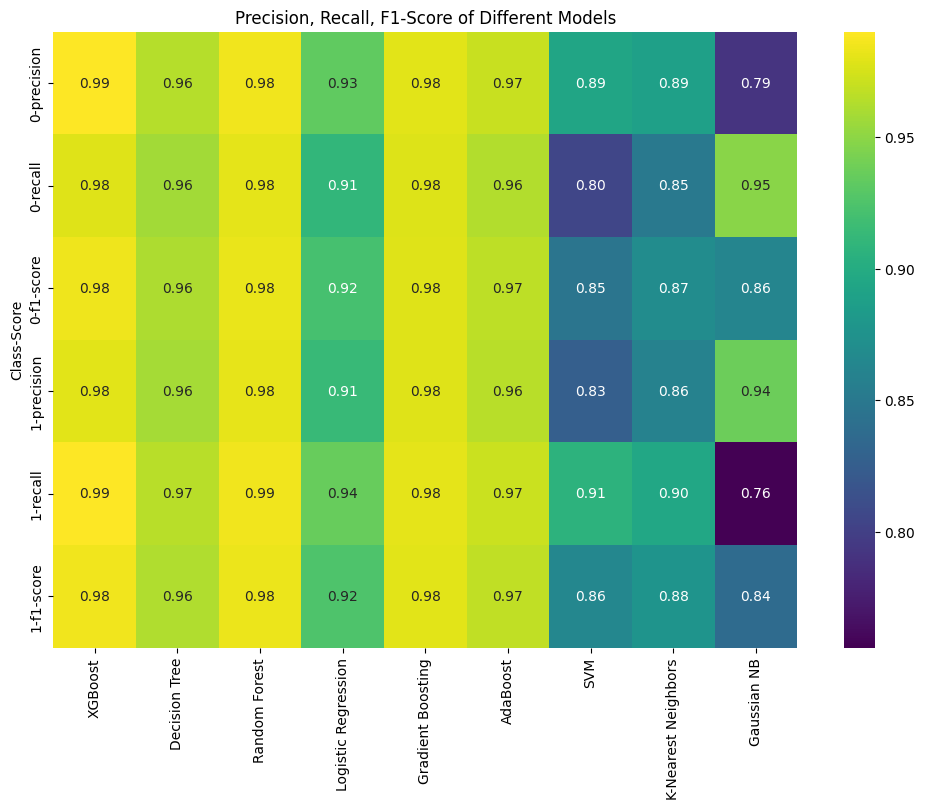

In [29]:
# List of models and their names
models = {
    "XGBoost": xgb_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Logistic Regression": lr_model,
    "Gradient Boosting": gb_model,
    "AdaBoost": ab_model,
    "SVM": svm_model,
    "K-Nearest Neighbors": knn_model,
    "Gaussian NB": gnb_model
}

# Predictions and true values
predictions = {
    "XGBoost": xgb_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "Logistic Regression": lr_pred,
    "Gradient Boosting": gb_pred,
    "AdaBoost": ab_pred,
    "SVM": svm_pred,
    "K-Nearest Neighbors": knn_pred,
    "Gaussian NB": gnb_pred
}

# Accuracy scores
accuracies = {
    "XGBoost": xgb_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "Logistic Regression": lr_accuracy,
    "Gradient Boosting": gb_accuracy,
    "AdaBoost": ab_accuracy,
    "SVM": svm_accuracy,
    "K-Nearest Neighbors": knn_accuracy,
    "Gaussian NB": gnb_accuracy
}

# Plotting accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.xticks(rotation=45)
plt.show()

# Plotting confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for ax, (model_name, model_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, model_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

# Plotting ROC curves
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):  # Some models don't have predict_proba
        y_proba = model.predict_proba(X_test_selected_borutashapXGB)[:, 1]
    else:
        y_proba = model.decision_function(X_test_selected_borutashapXGB)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Generating classification reports
reports = {}
for model_name, model_pred in predictions.items():
    report = classification_report(y_test, model_pred, output_dict=True)
    reports[model_name] = report

# Plotting precision, recall, f1-score heatmap
scores = ['precision', 'recall', 'f1-score']
report_data = {model: [reports[model][str(i)][score] for i in range(len(set(y_test))) for score in scores] for model in reports}

report_df = pd.DataFrame(report_data, index=pd.MultiIndex.from_product([range(len(set(y_test))), scores], names=['Class', 'Score']))

plt.figure(figsize=(12, 8))
sns.heatmap(report_df, annot=True, cmap='viridis', fmt='.2f')
plt.title('Precision, Recall, F1-Score of Different Models')
plt.show()


In [30]:
xgb_model = xgb.XGBClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
gnb_model = GaussianNB()

In [31]:
xgb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
gnb_model.fit(X_train, y_train)

GaussianNB()

In [32]:
print("XGBoost Accuracy:", xgb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("GaussianNB Accuracy:", gnb_accuracy)

XGBoost Accuracy: 0.9845
Decision Tree Accuracy: 0.9615
Random Forest Accuracy: 0.983
Logistic Regression Accuracy: 0.923
Gradient Boosting Accuracy: 0.979
AdaBoost Accuracy: 0.9675
SVM Accuracy: 0.856
KNN Accuracy: 0.873
GaussianNB Accuracy: 0.851
